In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import ingest
import numpy as np
import pandas as pd
df = ingest.setup('../../capture')

Dropped 1 outlier coordinate


bssid
RESEARCH_MULLINS_0    1.000000
RESEARCH_MULLINS_1    0.926667
RESEARCH_MULLINS_2    0.995556
RESEARCH_MULLINS_3    0.982222
RESEARCH_MULLINS_4    1.000000
RESEARCH_MULLINS_5    0.826667
RESEARCH_MULLINS_6    0.917778
RESEARCH_MULLINS_7    1.000000
RESEARCH_MULLINS_8    1.000000
RESEARCH_MULLINS_9    1.000000
Name: pass, dtype: float64


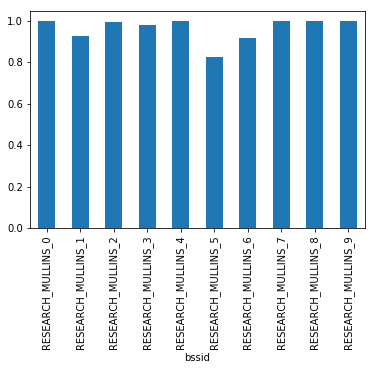

In [3]:
# AP Detection Performance
import capmap
# number of passes
passes = len(df.groupby(['test','pass']).count())
# get number of bssids captured
num_bssids = df.groupby(['bssid','test'])['pass'].nunique().sum(level='bssid')
performance = num_bssids/passes
performance = performance.rename(capmap.get_names_from_bssid).sort_index()
print(performance)
performance.plot(kind="bar")

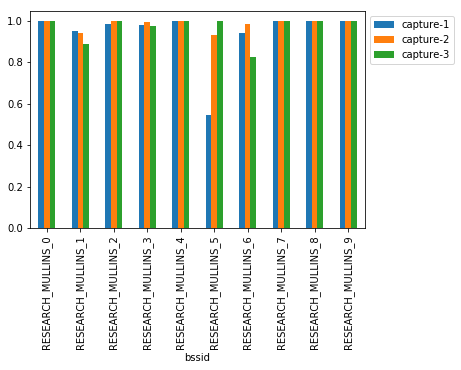

In [5]:
# Performance Per Capture Point
capture_passes = len(df.groupby(['pass']).count())
num_bssids_per = df.groupby(['bssid','test'])['pass'].nunique().unstack()
performance_per = num_bssids_per / capture_passes
performance_per = performance_per.rename(capmap.get_names_from_bssid).sort_index()
performance_per.plot(kind="bar").legend(bbox_to_anchor=(1,1))

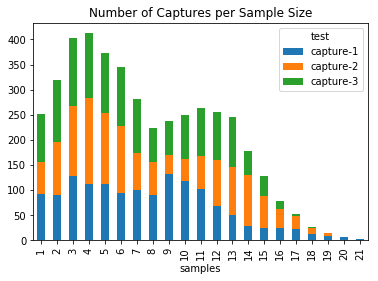

In [6]:
sample_spread = df.groupby(['test', 'pass','bssid'], as_index=False)['ssi'].count().rename(columns={'ssi':'samples'}).groupby(['test','samples'])['bssid'].count().unstack().T
sample_spread.plot(kind='bar', stacked=True, title="Number of Captures per Sample Size")
